# Business Case : To predict the likelihood of a liability customer buying personal loans.

In [92]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [93]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [94]:
data


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [95]:
#Removing the id and ZIPCode column because they are irrelevant to this data
data= data.drop(["ID","ZIP Code"],axis=1)

In [96]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [97]:
data["Personal Loan"].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [99]:
#From the Above info we can see that no column is in categorical form which needs to be converted 

In [100]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


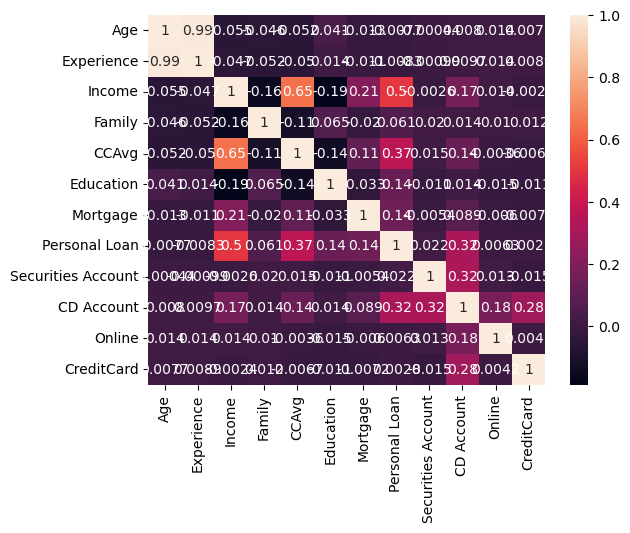

<Figure size 5000x2000 with 0 Axes>

In [124]:
sns.heatmap(data.corr(),annot=True)
plt.figure(figsize=(50,20))
plt.show()

In [101]:
data['Experience'].value_counts()
#We can see that there are some Negative values in thisand it can be because of Typo error 

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: count, dtype: int64

In [102]:
#We will change all negative values 
data['Experience'] = data['Experience'].abs()

In [103]:
#We can see that one feature (like Income) has a range of 0 to 200,000 and another (like Family) has a range of $1$ to $4$, the model will mistakenly think Income is thousands of times more importan

In [22]:
features = data.drop("Personal Loan",axis=1)

In [104]:
#Applying Standard Scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)
x_scaled_data = pd.DataFrame(x_scaled, columns=features.columns)

In [105]:
#If you see that your values have become negative ,then it means you have done it correctly
x_scaled

array([[-1.77441684, -1.67640794, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09940383, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44984918, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033,  1.65282296, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.7404343 , -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.41357392,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [106]:
#For checking whether scaling has been done correctly , We will use this method
print(x_scaled_data.describe().round(2))
#mean=0 and std=1 means Scaling is perfect

           Age  Experience   Income   Family    CCAvg  Education  Mortgage  \
count  5000.00     5000.00  5000.00  5000.00  5000.00    5000.00   5000.00   
mean     -0.00        0.00     0.00     0.00    -0.00       0.00     -0.00   
std       1.00        1.00     1.00     1.00     1.00       1.00      1.00   
min      -1.95       -1.76    -1.43    -1.22    -1.11      -1.05     -0.56   
25%      -0.90       -0.89    -0.76    -1.22    -0.71      -1.05     -0.56   
50%      -0.03       -0.01    -0.21    -0.35    -0.25       0.14     -0.56   
75%       0.84        0.86     0.53     0.53     0.32       1.33      0.44   
max       1.89        2.00     3.26     1.40     4.61       1.33      5.69   

       Securities Account  CD Account   Online  CreditCard  
count             5000.00     5000.00  5000.00     5000.00  
mean                -0.00        0.00     0.00        0.00  
std                  1.00        1.00     1.00        1.00  
min                 -0.34       -0.25    -1.22       

In [107]:
#Training and Testing split
x = data.drop("Personal Loan",axis=1)
y = data["Personal Loan"]

In [35]:
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [36]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [108]:
#Training Input data
x_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4227,32,7,111,1,3.8,1,0,1,0,0,0
4676,39,13,68,3,2.1,1,0,1,0,1,0
800,31,7,173,1,6.0,1,0,0,0,1,0
3671,50,25,18,1,0.4,3,0,0,0,1,0
4193,62,37,31,3,0.2,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4426,33,8,140,1,4.6,1,0,0,0,1,0
466,25,0,13,2,0.9,3,0,0,0,1,0
3092,43,18,113,2,0.4,1,325,1,0,0,0
3772,35,10,152,2,3.0,1,0,0,0,1,0


In [109]:
#Training Output Data
y_train

4227    0
4676    0
800     0
3671    0
4193    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Personal Loan, Length: 4000, dtype: int64

In [110]:
#Impoting Support Vector Machine
from sklearn.svm import SVC
SV = SVC()
SV.fit(x_train,y_train)

SVC()

In [44]:
from sklearn.metrics import accuracy_score,classification_report

In [111]:
#Checking accuracy score of Training model
y_pred = SV.predict(x_train)
accuracy_score(y_train,y_pred)

0.9125

In [112]:
#Checking Accuracy model of testing model
y_predict = SV.predict(x_test)
accuracy_score(y_test,y_predict)

0.9

**Training Score is 0.91 and Testing Score is 0.9. This tells that the model is working Perfectly ,but To have more Accuracy we will Apply hyperparameter and Check**

In [113]:
#Importing Grid Search
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf']}

In [52]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

In [54]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [114]:
#These are the best values for this model
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [115]:
#Checking the Training Accuracy
grid_pred = grid.predict(x_train)
accuracy_score(y_train,grid_pred)

0.99

In [116]:
#Checkingthe Testing Accuracy
grid_predict = grid.predict(x_test)
accuracy_score(y_test,grid_predict)

0.956

**We can see that the Accuracy score of Training and testing data has increased and 0.95 Score is Perfect**

In [117]:
#Checking the model by giving some input
newdata = np.array([[49,48,99,3,7.6,3,9,1,0,0,1]])

In [86]:
prediction = grid.predict(newdata)

In [87]:
prediction

array([1])

In [89]:
import pickle

# 1. Save the trained SVM model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(SV, file)

# 2. Save the Scaler (Don't forget this!)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)